In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors as colors
%matplotlib inline
import pandas as pd
import numpy as np

sns.set(style="darkgrid")
sns.set_context("paper")

In [2]:
df = pd.read_csv('Results/run1.csv')
df2 = pd.read_csv('Results/run2.csv')

In [3]:
def plot_run(df, window_len= 20, color_code=(0, 0, 1), window='hanning'):
    
    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")
    
    x = df['Step'].tolist()
    y = df['Value'].tolist()

    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y_ = np.convolve(w/w.sum(),y ,mode='valid')
    x_ = x[window_len-1:] #np.convolve(w/w.sum(),x ,mode='valid')

    plt.plot(x, y,  color=colors.to_rgba(color_code, alpha=0.4))
    plt.plot(x_, y_, color=color_code, linewidth=1.5)


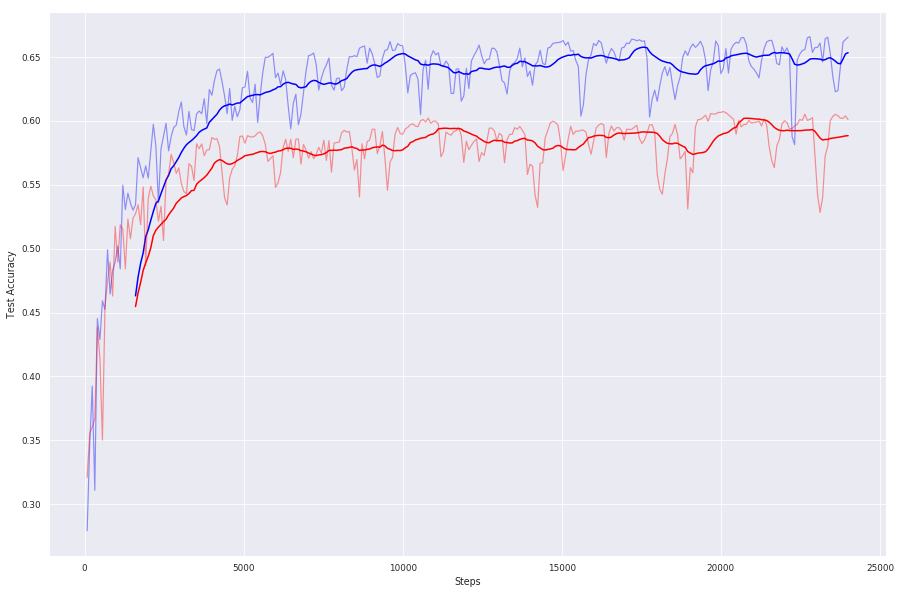

In [4]:
plt.figure(figsize=(15, 10))
plt.xlabel('Steps')
plt.ylabel('Test Accuracy')
plot_run(df, window='flat')
plot_run(df2, color_code=(1,0,0), window='flat')
plt.savefig("Results/output.png")
plt.show()